# Music type recognition

In this notebook, we will use the Music Beat data set to experiment with the Support Vector Machine classification algorithm.

https://www.kaggle.com/insiyeah/musicfeatures

In [1]:
# boilerplate imports for data exploration

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**Important**

There are 2 datasets:
- The first is for binary classification
- The second is for multiclass classification (10 classes).

## Binary classification

In [2]:
raw_df_2 = pd.read_csv("musicfeatures/data_2genre.csv")
raw_df_2.shape

(200, 30)

In [3]:
raw_df_2.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [4]:
raw_df_2.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                   int64
dtype: object

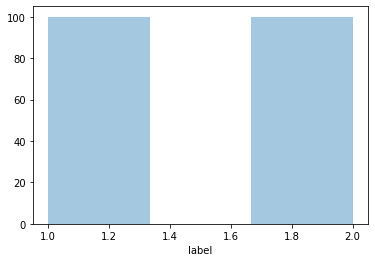

In [5]:
sns.distplot(raw_df_2["label"], kde=False)

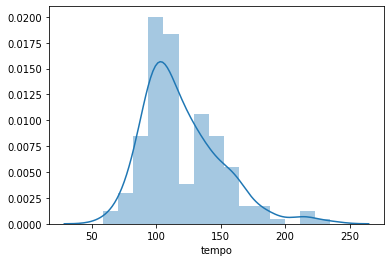

In [6]:
sns.distplot(raw_df_2["tempo"])

Let's 
- define X and y
- split the dataset between train and test

In [7]:
# for X we drop the label AND filename, which is a string
X = raw_df_2.drop(["filename","label"], axis="columns")
y = raw_df_2["label"]


from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
subsets = [X_train, X_valid, y_train, y_valid]
# for subset in subsets:
#     print(subset.shape)

Let's now instantiate an SVM model and fit it:

In [8]:
from sklearn import svm

classifier = svm.SVC()
classifier.fit(X_train, y_train)

/home/guillaume/miniconda3/envs/ds/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
preds = classifier.predict(X_train)

from sklearn.metrics import accuracy_score

accuracy_score(preds, y_train)

1.0

100% accurate, no work needed. It was a bit *too* easy. Maybe the second dataset, which has 10 classes, will prove a bit less easy to crack. :-)

## Multiclass

In [10]:
raw_df = pd.read_csv("musicfeatures/data.csv")
raw_df.head(3)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues


In [11]:
raw_df.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

Let's notice that the labels, this time, are **strings**.

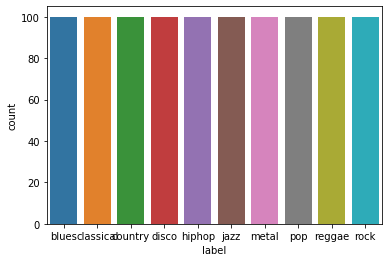

In [12]:
sns.countplot(raw_df["label"])

In [13]:
X_train = raw_df.drop(["filename","label"], axis="columns")
y_train = raw_df["label"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
subsets = [X_train, X_valid, y_train, y_valid]

for subset in subsets:
    print(subset.shape)

(140, 28)
(60, 28)
(140,)
(60,)


In [14]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

/home/guillaume/miniconda3/envs/ds/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
preds = classifier.predict(X_train)

from sklearn.metrics import accuracy_score

accuracy_score(preds, y_train)

1.0

This was just as easy. No fun !